In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
from keras import backend as K
import keras.layers as layers
from keras.models import Model
from keras import Sequential
from keras.layers import Lambda, Dense, Flatten
from sklearn.metrics import roc_curve, roc_auc_score
from keras.losses import binary_crossentropy
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras import layers
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.
/home/bpnachman/anaconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/bpnachman/anaconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/bpnachman/anaconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/bpnachma

In [3]:
G4_occupancy = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays/5layers/GEANT4/GEANT4_occupancy.npy")
GAN_occupancy = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays/5layers/3D_DCTR_DiBAE_5layers_DiBiBAE_LinMultV2/3D_DCTR_DiBAE_5layers_DiBiBAE_LinMultV2_occupancy.npy")

G4_Center = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays/5layers/GEANT4/GEANT4_CenterOfGravity.npy")
GAN_Center = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays/5layers/3D_DCTR_DiBAE_5layers_DiBiBAE_LinMultV2/3D_DCTR_DiBAE_5layers_DiBiBAE_LinMultV2_CenterOfGravity.npy")

G4_energy = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays/5layers/GEANT4/GEANT4_energy.npy")
GAN_energy = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays/5layers/3D_DCTR_DiBAE_5layers_DiBiBAE_LinMultV2/3D_DCTR_DiBAE_5layers_DiBiBAE_LinMultV2_energy.npy")

G4_longitud_energy = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays/5layers/GEANT4/GEANT4_longitud_energy.npy")
GAN_longitud_energy = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays/5layers/3D_DCTR_DiBAE_5layers_DiBiBAE_LinMultV2/3D_DCTR_DiBAE_5layers_DiBiBAE_LinMultV2_longitud_energy.npy")

In [79]:
G4_occupancy30 = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/GEANT4/GEANT4_occupancy.npy")
GAN_occupancy30 = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/3D_DiBAE_DiBiBAE_LinMultV2/3D_DiBAE_DiBiBAE_LinMultV2_occupancy.npy")

G4_Center30 = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/GEANT4/GEANT4_CenterOfGravity.npy")
GAN_Center30 = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/3D_DiBAE_DiBiBAE_LinMultV2/3D_DiBAE_DiBiBAE_LinMultV2_CenterOfGravity.npy")

G4_energy30 = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/GEANT4/GEANT4_energy.npy")
GAN_energy30 = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/3D_DiBAE_DiBiBAE_LinMultV2/3D_DiBAE_DiBiBAE_LinMultV2_energy.npy")

G4_longitud_energy30 = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/GEANT4/GEANT4_longitud_energy.npy")
GAN_longitud_energy30 = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/3D_DiBAE_DiBiBAE_LinMultV2/3D_DiBAE_DiBiBAE_LinMultV2_longitud_energy.npy")

G4_longitud_Moment_2_x = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/GEANT4/GEANT4_Moment_2_x_layers.npy")
GAN_longitud_Moment_2_x = np.load("/data0/bpnachman/DCTRGAN/BiBAE_DCTR_NumpyArrays_New/3D_DiBAE_DiBiBAE_LinMultV2/3D_DiBAE_DiBiBAE_LinMultV2_Moment_2_x_layers.npy")

In [85]:
G4_longitud_Moment_2_x = np.nan_to_num(G4_longitud_Moment_2_x)
GAN_longitud_Moment_2_x = np.nan_to_num(GAN_longitud_Moment_2_x)

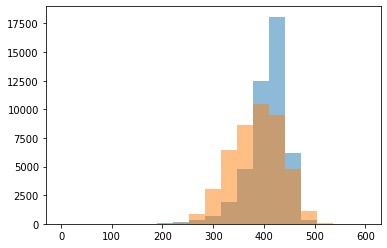

In [4]:
_,_,_=plt.hist(G4_occupancy,alpha=0.5,bins=np.linspace(0,600,20))
_,_,_=plt.hist(GAN_occupancy,alpha=0.5,bins=np.linspace(0,600,20))

In [20]:
X_G4 = np.c_[G4_occupancy/1000.,G4_Center,G4_energy/1000.,G4_longitud_energy[:,0]/1000.,G4_longitud_energy[:,1]/1000.,G4_longitud_energy[:,2]/1000.,G4_longitud_energy[:,3]/1000.,G4_longitud_energy[:,4]/1000.]
X_GAN = np.c_[GAN_occupancy/1000.,GAN_Center,GAN_energy/1000.,GAN_longitud_energy[:,0]/1000.,GAN_longitud_energy[:,1]/1000.,GAN_longitud_energy[:,2]/1000.,GAN_longitud_energy[:,3]/1000.,GAN_longitud_energy[:,4]/1000.]

In [21]:
X2 = np.concatenate([X_G4,X_GAN])
Y2 = np.concatenate([np.ones(len(X_G4)),np.zeros(len(X_GAN))])
X2_train, X2_val, Y2_train, Y2_val = train_test_split(X2, Y2, test_size=0.5)

In [22]:
model2 = Sequential()
model2.add(Dense(128, activation='relu',input_shape =(8,))) 
model2.add(Dense(128, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist_model2 = model2.fit(X2_train, Y2_train, epochs=30, batch_size=128,validation_data=(X2_val, Y2_val))

Train on 45000 samples, validate on 45000 samples
Epoch 1/30
45000/45000 [==============================] - 2s 52us/step - loss: 0.6700 - acc: 0.5841 - val_loss: 0.6266 - val_acc: 0.6462
Epoch 2/30
45000/45000 [==============================] - 2s 47us/step - loss: 0.5993 - acc: 0.6711 - val_loss: 0.5636 - val_acc: 0.7216
Epoch 3/30
45000/45000 [==============================] - 2s 47us/step - loss: 0.5543 - acc: 0.7102 - val_loss: 0.5436 - val_acc: 0.7281
Epoch 4/30
45000/45000 [==============================] - 2s 48us/step - loss: 0.5346 - acc: 0.7218 - val_loss: 0.5178 - val_acc: 0.7349
Epoch 5/30
45000/45000 [==============================] - 2s 48us/step - loss: 0.5240 - acc: 0.7272 - val_loss: 0.5085 - val_acc: 0.7377
Epoch 6/30
45000/45000 [==============================] - 2s 48us/step - loss: 0.5124 - acc: 0.7370 - val_loss: 0.5259 - val_acc: 0.7135
Epoch 7/30
45000/45000 [==============================] - 2s 46us/step - loss: 0.5058 - acc: 0.7383 - val_loss: 0.5022 - val_acc

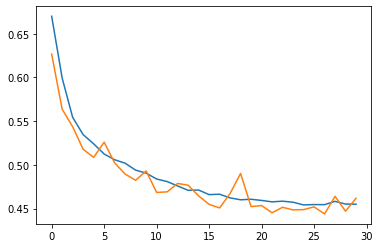

In [23]:
plt.plot(hist_model2.history['loss'])
plt.plot(hist_model2.history['val_loss'])

In [24]:
weights2_hold = model2.predict(X2_val)
weights2 = weights2_hold/(1.-weights2_hold)

(array([9920., 1799., 1199.,  949.,  785.,  707.,  614.,  546.,  427.,
         461.,  391.,  393.,  322.,  294.,  264.,  248.,  237.,  244.,
         175.]),
 array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
        0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
        1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
        1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]),
 <a list of 19 Patch objects>)

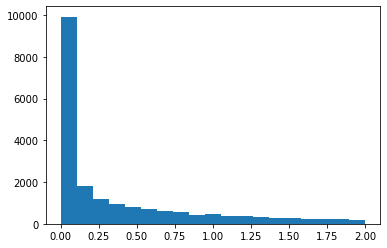

In [25]:
plt.hist(weights2[Y2_val==0],bins=np.linspace(0,2,20))

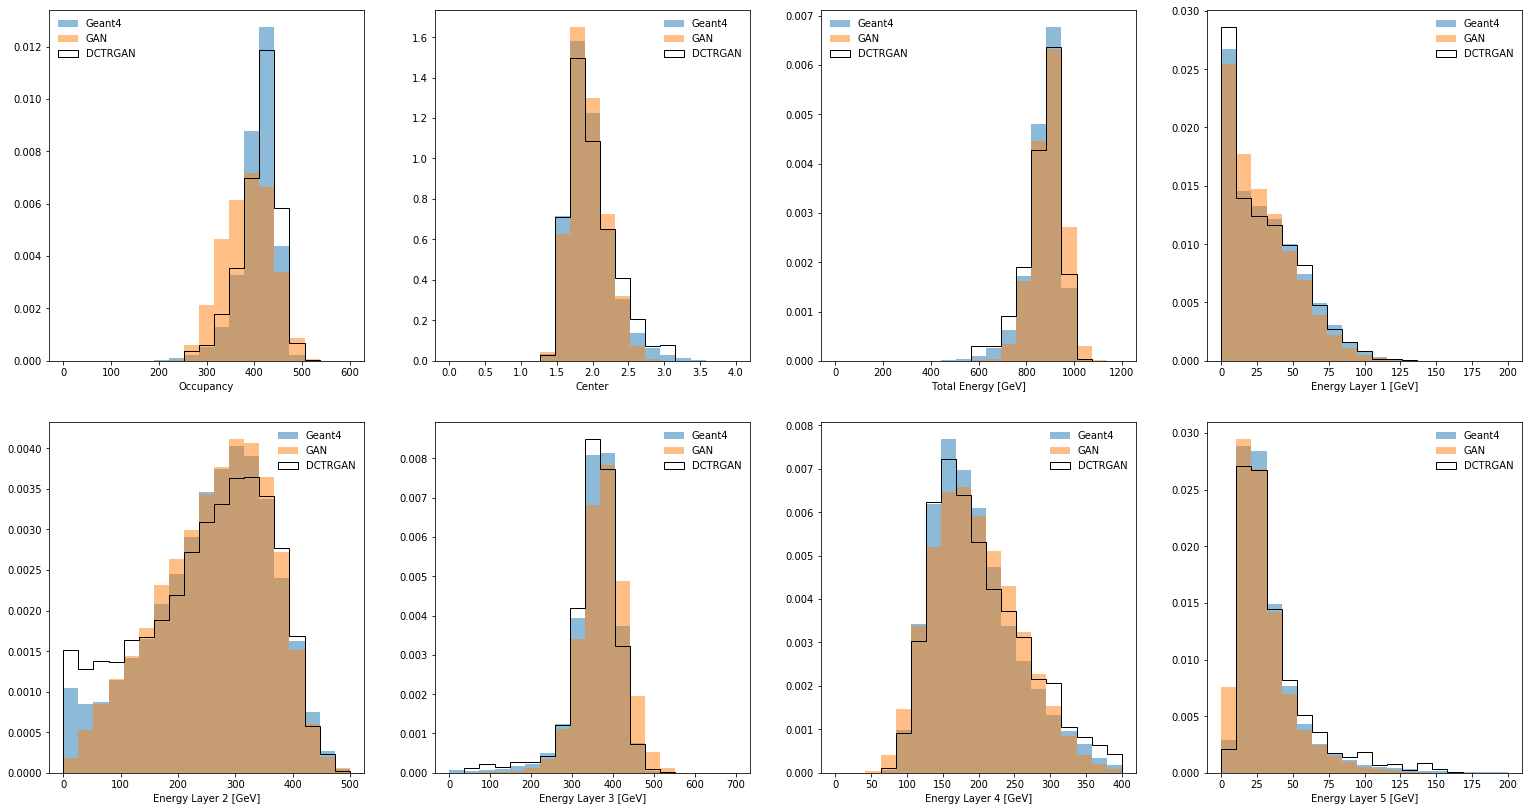

In [26]:
figure, axes = plt.subplots(figsize=(22, 12),nrows=2, ncols=4)
figure.tight_layout(pad=4.0)

ax0 = plt.subplot(241)
_,_,_=plt.hist(X2_val[Y2_val==1][:,0]*1000,alpha=0.5,bins=np.linspace(0,600,20),label="Geant4",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,0]*1000,alpha=0.5,bins=np.linspace(0,600,20),label="GAN",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,0]*1000,weights=weights2[Y2_val==0],color="black",bins=np.linspace(0,600,20),label="DCTRGAN",density=True,histtype="step")
plt.legend(frameon=False)
plt.xlabel("Occupancy")

ax0 = plt.subplot(242)
_,_,_=plt.hist(X2_val[Y2_val==1][:,1],alpha=0.5,bins=np.linspace(0,4,20),label="Geant4",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,1],alpha=0.5,bins=np.linspace(0,4,20),label="GAN",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,1],weights=weights2[Y2_val==0],color="black",bins=np.linspace(0,4,20),label="DCTRGAN",density=True,histtype="step")
plt.legend(frameon=False)
plt.xlabel("Center")

ax0 = plt.subplot(243)
_,_,_=plt.hist(X2_val[Y2_val==1][:,2]*1000,alpha=0.5,bins=np.linspace(0,1200,20),label="Geant4",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,2]*1000,alpha=0.5,bins=np.linspace(0,1200,20),label="GAN",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,2]*1000,weights=weights2[Y2_val==0],color="black",bins=np.linspace(0,1200,20),label="DCTRGAN",density=True,histtype="step")
plt.legend(frameon=False)
plt.xlabel("Total Energy [GeV]")

ax0 = plt.subplot(244)
_,_,_=plt.hist(X2_val[Y2_val==1][:,3]*1000,alpha=0.5,bins=np.linspace(0,200,20),label="Geant4",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,3]*1000,alpha=0.5,bins=np.linspace(0,200,20),label="GAN",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,3]*1000,weights=weights2[Y2_val==0],color="black",bins=np.linspace(0,200,20),label="DCTRGAN",density=True,histtype="step")
plt.legend(frameon=False)
plt.xlabel("Energy Layer 1 [GeV]")

ax0 = plt.subplot(245)
_,_,_=plt.hist(X2_val[Y2_val==1][:,4]*1000,alpha=0.5,bins=np.linspace(0,500,20),label="Geant4",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,4]*1000,alpha=0.5,bins=np.linspace(0,500,20),label="GAN",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,4]*1000,weights=weights2[Y2_val==0],color="black",bins=np.linspace(0,500,20),label="DCTRGAN",density=True,histtype="step")
plt.legend(frameon=False)
plt.xlabel("Energy Layer 2 [GeV]")

ax0 = plt.subplot(246)
_,_,_=plt.hist(X2_val[Y2_val==1][:,5]*1000,alpha=0.5,bins=np.linspace(0,700,20),label="Geant4",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,5]*1000,alpha=0.5,bins=np.linspace(0,700,20),label="GAN",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,5]*1000,weights=weights2[Y2_val==0],color="black",bins=np.linspace(0,700,20),label="DCTRGAN",density=True,histtype="step")
plt.legend(frameon=False)
plt.xlabel("Energy Layer 3 [GeV]")

ax0 = plt.subplot(247)
_,_,_=plt.hist(X2_val[Y2_val==1][:,6]*1000,alpha=0.5,bins=np.linspace(0,400,20),label="Geant4",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,6]*1000,alpha=0.5,bins=np.linspace(0,400,20),label="GAN",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,6]*1000,weights=weights2[Y2_val==0],color="black",bins=np.linspace(0,400,20),label="DCTRGAN",density=True,histtype="step")
plt.legend(frameon=False)
plt.xlabel("Energy Layer 4 [GeV]")

ax0 = plt.subplot(248)
_,_,_=plt.hist(X2_val[Y2_val==1][:,7]*1000,alpha=0.5,bins=np.linspace(0,200,20),label="Geant4",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,7]*1000,alpha=0.5,bins=np.linspace(0,200,20),label="GAN",density=True)
_,_,_=plt.hist(X2_val[Y2_val==0][:,7]*1000,weights=weights2[Y2_val==0],color="black",bins=np.linspace(0,200,20),label="DCTRGAN",density=True,histtype="step")
plt.legend(frameon=False)
plt.xlabel("Energy Layer 5 [GeV]")

plt.savefig("TestHighLevel.pdf",bbox_inches='tight')

In [55]:
def makeplotwithratio(plotname,whichone=0,mybins=np.linspace(250,500,20),multiplier=1000,axisname=r"Number of Activated Cells"):

    fig = plt.figure(figsize=(8, 8))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    ax0.minorticks_on()

    plt.xlabel(r"",fontsize=20)
    plt.ylabel(r"Normalized to unity",fontsize=20)
    plt.locator_params(axis='y', nbins=6)

    if (whichone < 8):
        _,_,_=plt.hist(X2_val[Y2_val==1][:,whichone]*multiplier,alpha=0.5,bins=mybins,label="Geant4",density=True)
        _,_,_=plt.hist(X2_val[Y2_val==0][:,whichone]*multiplier,alpha=0.5,bins=mybins,label="GAN",density=True)
        _,_,_=plt.hist(X2_val[Y2_val==0][:,whichone]*multiplier,weights=weights2[Y2_val==0],color="black",bins=mybins,label="DCTRGAN",density=True,histtype="step",linewidth=3)
    elif (whichone==8):
        _,_,_=plt.hist(X2_val[Y2_val==1][:,5]*multiplier-X2_val[Y2_val==1][:,6]*multiplier,alpha=0.5,bins=mybins,label="Geant4",density=True)
        _,_,_=plt.hist(X2_val[Y2_val==0][:,5]*multiplier-X2_val[Y2_val==0][:,6]*multiplier,alpha=0.5,bins=mybins,label="GAN",density=True)
        _,_,_=plt.hist(X2_val[Y2_val==0][:,5]*multiplier-X2_val[Y2_val==0][:,6]*multiplier,weights=weights2[Y2_val==0],color="black",bins=mybins,label="DCTRGAN",density=True,histtype="step",linewidth=3) 
        pass
    plt.legend(frameon=False,fontsize=20)
    plt.xticks(fontsize=0)

    if (whichone < 8):
        myn2,bmjj=np.histogram(X2_val[Y2_val==1][:,whichone]*multiplier,bins=mybins)
        myn,_=np.histogram(X2_val[Y2_val==0][:,whichone]*multiplier,bins=mybins)
        myn3,_=np.histogram(X2_val[Y2_val==0][:,whichone]*multiplier,weights=weights2[Y2_val==0][:,0],bins=mybins)
    elif (whichone==8):
        myn2,bmjj=np.histogram(X2_val[Y2_val==1][:,5]*multiplier-X2_val[Y2_val==1][:,6]*multiplier,bins=mybins)
        myn,_=np.histogram(X2_val[Y2_val==0][:,5]*multiplier-X2_val[Y2_val==0][:,6]*multiplier,bins=mybins)
        myn3,_=np.histogram(X2_val[Y2_val==0][:,5]*multiplier-X2_val[Y2_val==0][:,6]*multiplier,weights=weights2[Y2_val==0][:,0],bins=mybins)
        pass
    
    #plt.text(250,0.008,"50 GeV photons",fontsize=20)

    ax1 = plt.subplot(gs[1])
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax1.tick_params(direction="in",which="both")
    ax1.minorticks_on()
    plt.locator_params(axis='x', nbins=6)
    plt.xlabel(axisname,fontsize=20)
    plt.ylabel("Ratio to G4",fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=15)
    plt.axhline(y=1,linewidth=2, color='gray')   
    plt.errorbar(0.5*(bmjj[1:]+bmjj[:-1]),(myn3/sum(myn3))/(myn2/sum(myn2)),yerr=(myn3+myn2)**0.5/myn2,color='black',fmt='s')
    plt.errorbar(0.5*(bmjj[1:]+bmjj[:-1]),(myn/sum(myn))/(myn2/sum(myn2)),yerr=(myn+myn2)**0.5/myn2,color='#ff7f0e',fmt='o',alpha=0.5)
    plt.ylim(0.,2.5)

    plt.savefig(plotname,bbox_inches='tight')

/home/bpnachman/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in true_divide
/home/bpnachman/anaconda3/envs/myenv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:3370: RuntimeWarning: invalid value encountered in double_scalars
  low = [v - e for v, e in zip(data, a)]
/home/bpnachman/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in true_divide


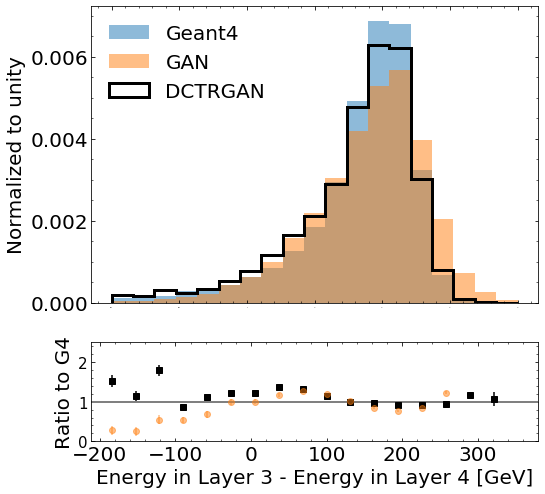

In [56]:
#makeplotwithratio("Occupancy.pdf",whichone=0)
#makeplotwithratio("Center.pdf",whichone=1,mybins=np.linspace(1.,3.5,20),multiplier=1,axisname="Longitudinal Centroid")
#makeplotwithratio("TotalEnergy.pdf",mybins=np.linspace(550,1050,20),whichone=2,axisname="Total Energy [GeV]")
#makeplotwithratio("EnergyLayer1.pdf",mybins=np.linspace(0,120,20),whichone=3,axisname="Energy in Layer 1 [GeV]")
#makeplotwithratio("EnergyLayer2.pdf",mybins=np.linspace(0,500,20),whichone=4,axisname="Energy in Layer 2 [GeV]")
#makeplotwithratio("EnergyLayer3.pdf",mybins=np.linspace(20,600,20),whichone=5,axisname="Energy in Layer 3 [GeV]")
#makeplotwithratio("EnergyLayer4.pdf",mybins=np.linspace(50,400,20),whichone=6,axisname="Energy in Layer 4 [GeV]")
#makeplotwithratio("EnergyLayer5.pdf",mybins=np.linspace(0,150,20),whichone=7,axisname="Energy in Layer 5 [GeV]")
makeplotwithratio("EnergyLayer34.pdf",mybins=np.linspace(-200,400,20),whichone=8,axisname="Energy in Layer 3 - Energy in Layer 4 [GeV]")

In [100]:
X30_G4 = np.c_[G4_occupancy30/1000.,G4_Center30,G4_energy30/1000.,G4_longitud_energy30/1000.]
X30_GAN = np.c_[GAN_occupancy30/1000.,GAN_Center30,GAN_energy30/1000.,GAN_longitud_energy30/1000.]

Z30_G4 = np.c_[G4_longitud_Moment_2_x]
Z30_GAN = np.c_[GAN_longitud_Moment_2_x]

In [101]:
X30 = np.concatenate([X30_G4,X30_GAN])
Y30 = np.concatenate([np.ones(len(X30_G4)),np.zeros(len(X30_GAN))])
Z30 = np.concatenate([Z30_G4,Z30_GAN])
X30_train, X30_val, Y30_train, Y30_val, Z30_train, Z30_val = train_test_split(X30, Y30, Z30, test_size=0.5)

In [102]:
model30 = Sequential()
model30.add(Dense(128, activation='relu',input_shape =(33,))) 
model30.add(Dense(128, activation='relu'))
model30.add(Dense(1, activation='sigmoid'))
model30.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist_model30 = model30.fit(X30_train, Y30_train, epochs=30, batch_size=128,validation_data=(X30_val, Y30_val))

Train on 50000 samples, validate on 50000 samples
Epoch 1/30
50000/50000 [==============================] - 3s 54us/step - loss: 0.6966 - acc: 0.5143 - val_loss: 0.6872 - val_acc: 0.5522
Epoch 2/30
50000/50000 [==============================] - 2s 49us/step - loss: 0.6847 - acc: 0.5504 - val_loss: 0.6787 - val_acc: 0.5971
Epoch 3/30
50000/50000 [==============================] - 2s 48us/step - loss: 0.6746 - acc: 0.5708 - val_loss: 0.6728 - val_acc: 0.5295
Epoch 4/30
50000/50000 [==============================] - 2s 47us/step - loss: 0.6603 - acc: 0.5962 - val_loss: 0.6496 - val_acc: 0.6240
Epoch 5/30
50000/50000 [==============================] - 2s 49us/step - loss: 0.6543 - acc: 0.6063 - val_loss: 0.6640 - val_acc: 0.5339
Epoch 6/30
50000/50000 [==============================] - 2s 49us/step - loss: 0.6356 - acc: 0.6298 - val_loss: 0.6219 - val_acc: 0.6598
Epoch 7/30
50000/50000 [==============================] - 2s 48us/step - loss: 0.6205 - acc: 0.6447 - val_loss: 0.6149 - val_acc

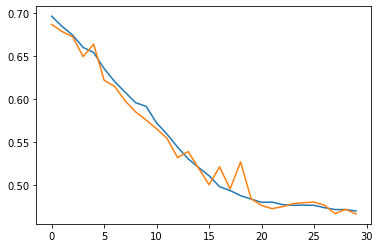

In [103]:
plt.plot(hist_model30.history['loss'])
plt.plot(hist_model30.history['val_loss'])

In [104]:
weights30_hold = model30.predict(X30_val)
weights30 = weights30_hold/(1.-weights30_hold)

(array([10056.,  2123.,  1389.,  1036.,   899.,   721.,   684.,   502.,
          495.,   424.,   461.,   405.,   366.,   336.,   311.,   309.,
          289.,   283.,   255.]),
 array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
        0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
        1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
        1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]),
 <a list of 19 Patch objects>)

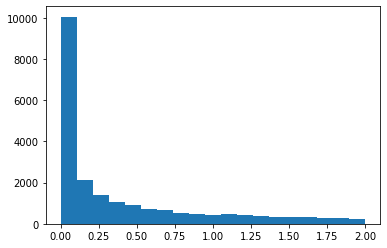

In [105]:
plt.hist(weights30[Y30_val==0],bins=np.linspace(0,2,20))

In [189]:
def makeplotwithratio30(plotname,whichone=0,mybins=np.linspace(250,500,20),multiplier=1000,axisname=r"Number of Activated Cells"):

    fig = plt.figure(figsize=(8, 8))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3,1]) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    ax0.minorticks_on()

    plt.xlabel(r"",fontsize=20)
    plt.ylabel(r"Normalized to unity",fontsize=20)
    plt.locator_params(axis='y', nbins=6)

    if (whichone < 33):
        myn2,bmjj=np.histogram(X30_val[Y30_val==1][:,whichone]*multiplier,bins=mybins)
        myn,_=np.histogram(X30_val[Y30_val==0][:,whichone]*multiplier,bins=mybins)
        myn3,_=np.histogram(X30_val[Y30_val==0][:,whichone]*multiplier,weights=weights30[Y30_val==0][:,0],bins=mybins)
    elif (whichone < 33+30):
        myn2,bmjj=np.histogram(Z30_val[Y30_val==1][:,whichone-33]*multiplier,bins=mybins)
        myn,_=np.histogram(Z30_val[Y30_val==0][:,whichone-33]*multiplier,bins=mybins)
        myn3,_=np.histogram(Z30_val[Y30_val==0][:,whichone-33]*multiplier,weights=weights30[Y30_val==0][:,0],bins=mybins)
    elif (whichone==33):
        myn2,bmjj=np.histogram(X30_val[Y30_val==1][:,5]*multiplier-X30_val[Y30_val==1][:,6]*multiplier,bins=mybins)
        myn,_=np.histogram(X30_val[Y30_val==0][:,5]*multiplier-X30_val[Y30_val==0][:,6]*multiplier,bins=mybins)
        myn3,_=np.histogram(X30_val[Y30_val==0][:,5]*multiplier-X30_val[Y30_val==0][:,6]*multiplier,weights=weights30[Y30_val==0][:,0],bins=mybins)
        pass    
    
    if (whichone < 33):
        nG4,_=np.histogram(X30_val[Y30_val==1][:,whichone]*multiplier,bins=mybins,density=True)
        nGA,_=np.histogram(X30_val[Y30_val==0][:,whichone]*multiplier,bins=mybins,density=True)
        nGAD,_=np.histogram(X30_val[Y30_val==0][:,whichone]*multiplier,bins=mybins,weights=weights30[Y30_val==0][:,0],density=True) 
        
        _,_,_=plt.hist(X30_val[Y30_val==1][:,whichone]*multiplier,alpha=0.5,bins=mybins,label="Geant4",density=True)
        _,_,_=plt.hist(X30_val[Y30_val==0][:,whichone]*multiplier,alpha=0.5,bins=mybins,label=r"GAN ($\chi^2="+"%0.2f" % sum(100.*(nG4-nGA)**2)+"$)",density=True)
        _,_,_=plt.hist(X30_val[Y30_val==0][:,whichone]*multiplier,weights=weights30[Y30_val==0],color="black",bins=mybins,label="DCTRGAN ($\chi^2="+"%0.2f" % sum(100.*(nG4-nGAD)**2)+"$)",density=True,histtype="step",linewidth=3)
    elif (whichone<33+30):
        nG4,_=np.histogram(Z30_val[Y30_val==1][:,whichone-33]*multiplier,bins=mybins,density=True)
        nGA,_=np.histogram(Z30_val[Y30_val==0][:,whichone-33]*multiplier,bins=mybins,density=True)
        nGAD,_=np.histogram(Z30_val[Y30_val==0][:,whichone-33]*multiplier,bins=mybins,weights=weights30[Y30_val==0][:,0],density=True) 
        
        _,_,_=plt.hist(Z30_val[Y30_val==1][:,whichone-33]*multiplier,alpha=0.5,bins=mybins,label="Geant4",density=True)
        _,_,_=plt.hist(Z30_val[Y30_val==0][:,whichone-33]*multiplier,alpha=0.5,bins=mybins,label=r"GAN ($\chi^2="+"%0.2f" % sum(100.*(nG4-nGA)**2)+"$)",density=True)
        _,_,_=plt.hist(Z30_val[Y30_val==0][:,whichone-33]*multiplier,weights=weights30[Y30_val==0],color="black",bins=mybins,label="DCTRGAN ($\chi^2="+"%0.2f" % sum(100.*(nG4-nGAD)**2)+"$)",density=True,histtype="step",linewidth=3) 
        pass
    elif (whichone==33+30):
        _,_,_=plt.hist(X30_val[Y30_val==1][:,5]*multiplier-X30_val[Y30_val==1][:,6]*multiplier,alpha=0.5,bins=mybins,label="Geant4",density=True)
        _,_,_=plt.hist(X30_val[Y30_val==0][:,5]*multiplier-X30_val[Y30_val==0][:,6]*multiplier,alpha=0.5,bins=mybins,label="GAN",density=True)
        _,_,_=plt.hist(X30_val[Y30_val==0][:,5]*multiplier-X30_val[Y30_val==0][:,6]*multiplier,weights=weights30[Y30_val==0],color="black",bins=mybins,label="DCTRGAN",density=True,histtype="step",linewidth=3) 
        pass
    plt.legend(frameon=False,fontsize=20)
    plt.xticks(fontsize=0)

    #plt.text(250,0.008,"50 GeV photons",fontsize=20)

    ax1 = plt.subplot(gs[1])
    ax1.yaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax1.tick_params(direction="in",which="both")
    ax1.minorticks_on()
    plt.locator_params(axis='x', nbins=6)
    plt.xlabel(axisname,fontsize=20)
    plt.ylabel("Ratio to G4",fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=15)
    plt.axhline(y=1,linewidth=2, color='gray')   
    plt.errorbar(0.5*(bmjj[1:]+bmjj[:-1]),(myn3/sum(myn3))/(myn2/sum(myn2)),yerr=(myn3+myn2)**0.5/myn2,color='black',fmt='s')
    plt.errorbar(0.5*(bmjj[1:]+bmjj[:-1]),(myn/sum(myn))/(myn2/sum(myn2)),yerr=(myn+myn2)**0.5/myn2,color='#ff7f0e',fmt='o',alpha=0.5)
    plt.ylim(0.,2.5)

    plt.savefig(plotname,bbox_inches='tight')

In [ ]:
makeplotwithratio30("TotalEnergy30.pdf",mybins=np.linspace(550,1050,20),whichone=2,axisname="Total Energy [GeV]")
makeplotwithratio30("Occupancy30.pdf",whichone=0)
makeplotwithratio30("Center30.pdf",whichone=1,mybins=np.linspace(1.,3.5,20),multiplier=1,axisname="Longitudinal Centroid")
for i in range(30):
    mymax = 120
    if (i ==0):
        mymax = 2
    elif (i==1):
        mymax = 5
    elif (i==2):
        mymax = 15
    elif (i<5):
        mymax = 30
    elif (i>23):
        mymax=30
    makeplotwithratio30("EnergyLayer"+str(i)+"_30.pdf",mybins=np.linspace(0,mymax,20),whichone=3+i,axisname="Energy in Layer "+str(i)+" [GeV]")
#Next, look at the moments
for i in range(30):
    mymax = 20
    if (i==0):
        mymax=1
    elif (i==1):
        mymax=2
    elif (i>20 and i <= 25):
        mymax = 30
    elif (i>25):
        mymax = 50
    makeplotwithratio30("XMomentLayer"+str(i)+"_30.pdf",mybins=np.linspace(0,mymax,20),multiplier=1,whichone=33+i,axisname=r"$\langle X^2\rangle$ in Layer "+str(i)+" [GeV]")
    pass
#Make correlation matrix afer that.

/home/bpnachman/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in true_divide
/home/bpnachman/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in true_divide
/home/bpnachman/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/bpnachman/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in true_divide
/home/bpnachman/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in true_divide
/home/bpnachman/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in true_divide
/home/bpnachman/anaconda3/envs/myenv/lib/python3.6/site-packages/matplotlib/axes/_axes.py

In [ ]:
plt.hist(Z30_val[:,0],bins=np.linspace(0,0.1))

In [177]:
Z30_val[:,0]

array([0.99971163, 0.        , 0.        , ..., 0.        , 0.21987625,
       0.        ])